<a href="https://colab.research.google.com/github/Bharathi22ch/Web-Scraper-/blob/main/WebScraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average Price of Books: $38.05
Availability Counts:
Availability
In Stock    20
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


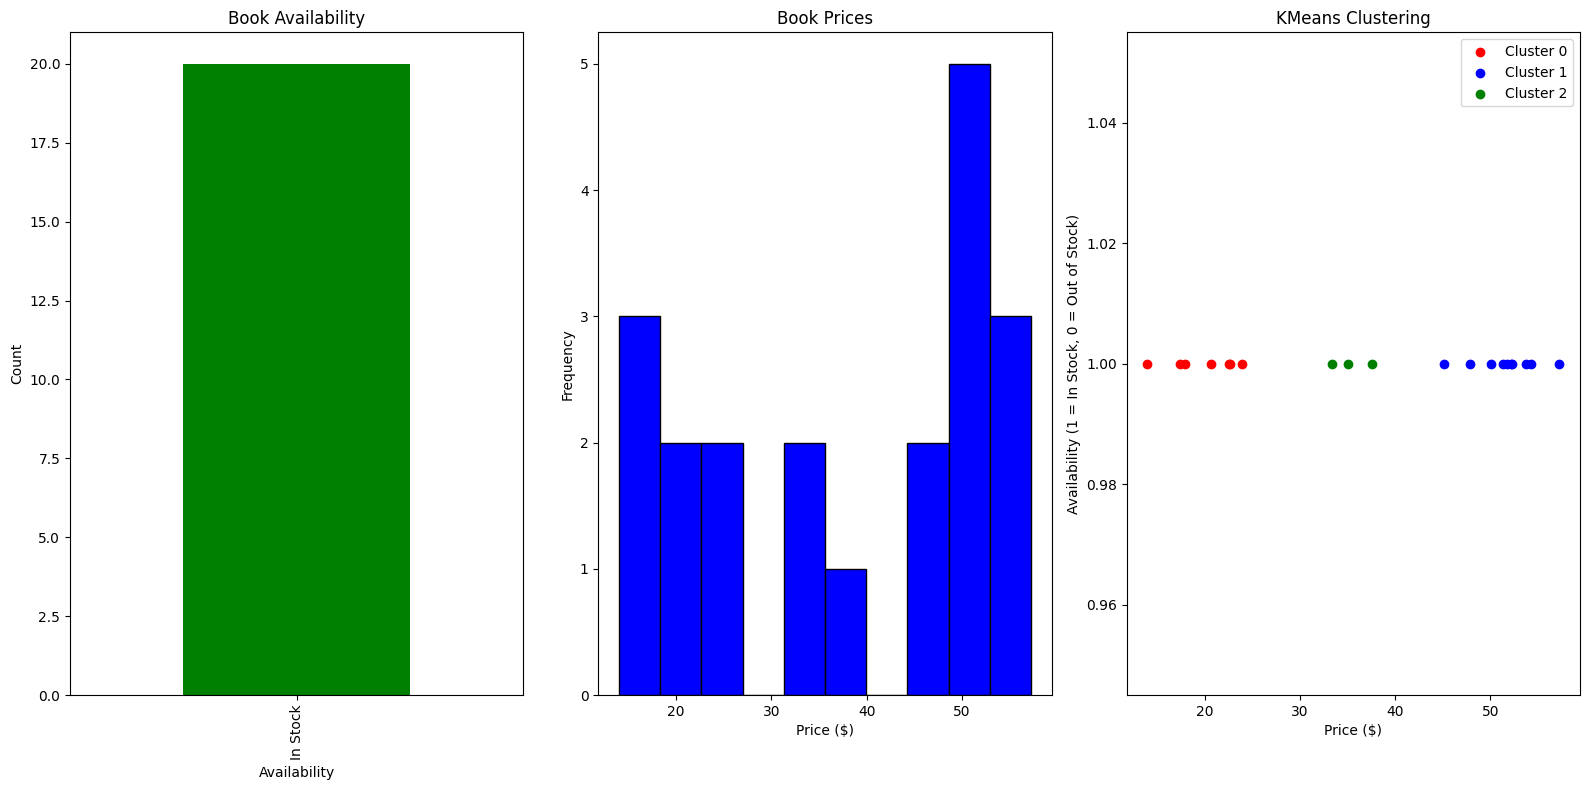

In [1]:
#The project is divided into four distinct phases, each with a specific time allocation
#--------------------------------------------------------------------------------------

# --->Data Collection (Web Scraping), which accounts for 30-40% of the project time, involves sending HTTP requests to the target website ((link unavailable)), parsing the HTML content using BeautifulSoup, and extracting essential data elements such as book titles, prices, and availability statuses.

# --->Data Cleaning, which consumes 20-30% of the project time, processes the scraped data to ensure it's in a usable format for analysis. This includes removing non-numeric characters, converting data types, and normalizing availability statuses.

# --->Data Analysis, which takes approximately 20-30% of the project time, performs statistical analysis and calculations to derive meaningful insights from the cleaned data. This includes calculating metrics such as average price, in-stock vs out-of-stock books, and other relevant statistical operations.

# --->Finally, Data Visualization, which accounts for 10-20% of the project time, creates visual representations of the analyzed data to facilitate understanding and decision-making. This includes bar charts, histograms, scatter plots, and other visualizations that effectively communicate key findings and insights.

# --->Each phase plays a crucial role in transforming raw web data into actionable insights, and the time allocated to each phase reflects its importance in ensuring the accuracy, usability, and communicability of the final results.
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Web Scraping
url = 'http://books.toscrape.com/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
# Extracting book data
books = soup.find_all('article', class_='product_pod')
book_data = []
for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    availability = book.find('p', class_='instock availability').text.strip()
    book_data.append([title, price, availability])
# Convert to DataFrame
df = pd.DataFrame(book_data, columns=['Title', 'Price', 'Availability'])
# Data Cleaning
df['Price'] = df['Price'].str.replace('£', '').str.replace('$', '').str.replace('Â', '').astype(float)
df['Availability'] = df['Availability'].apply(lambda x: 'In Stock' if 'In stock' in x else 'Out of Stock')
# Data Analysis
average_price = df['Price'].mean()
availability_counts = df['Availability'].value_counts()

print(f'Average Price of Books: ${average_price:.2f}')
print('Availability Counts:')
print(availability_counts)
# Data Mining: Clustering using KMeans
df['Availability_Num'] = df['Availability'].apply(lambda x: 1 if x == 'In Stock' else 0)
X = df[['Price', 'Availability_Num']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_
# Data Visualization
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
availability_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Book Availability')
plt.xlabel('Availability')
plt.ylabel('Count')
# Histogram for book prices
plt.subplot(1, 3, 2)
df['Price'].plot(kind='hist', bins=10, color='blue', edgecolor='black')
plt.title('Book Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
# Scatter plot for clustering
plt.subplot(1, 3, 3)
colors = ['red', 'blue', 'green']
for cluster in range(3):
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['Price'], clustered_data['Availability_Num'],
                label=f'Cluster {cluster}', color=colors[cluster])
plt.title('KMeans Clustering')
plt.xlabel('Price ($)')
plt.ylabel('Availability (1 = In Stock, 0 = Out of Stock)')
plt.legend()

plt.tight_layout()
plt.show()

